In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import sys

In [37]:
def train_adaline(x_inputs : np.array, yd : np.array, learning_rate : float, tol : float, maxepochs : int, control_var : bool):
    dimentions = list(x_inputs.shape)
    try:
        N_inputs = dimentions[0]
        n_val_inputs = dimentions[1]
    except Exception as error:
        print(f" The error {error} is happening. It's happening because n_val_inputs has 0 columns.")
        print(f" So, we will change it to 1")
        print(f"Changing ...")
        n_val_inputs = 1
        print(f"Now, n_val_inputs is {n_val_inputs}")
    finally:
        if control_var == True:
            
            w = np.random.uniform(size = n_val_inputs + 1) - 0.5
            # Estou organizando minha entrada x em colunas, e adicionando 1 coluna extra de 1s.
            aux = np.column_stack([np.ones_like(x_inputs[:, 1])])
            x_inputs = np.column_stack([x_inputs, aux])
        else:
            w = np.random.uniform(size = n_val_inputs) - 0.5

        n_epochs = 0 # É o número de vezes que estou treinando usando TODOS os dados de entrada.
        erro_epoch = tol + 1
        lst_errors_grad = np.zeros((maxepochs))

        # Loop while que resultará no treino do meu modelo.
        while ((n_epochs < maxepochs) and (erro_epoch > tol)):
            erro_grad = 0

            # Alterando a ordem de dados de treino, no fito de o gradiente descendente não ficar estático em 1 lugar específico.
            change_order_train = np.random.permutation(N_inputs)
            for i in range(N_inputs):
                i_rand = change_order_train[i]
                x_val_train = x_inputs[i_rand, : ]
                # Não é necessário fazer o np.transpose(), pois já fiz implicitamente através do column_stacks.
                y_hat = np.dot(x_val_train, w) #ŷ = ([X] @ w)
                err = (yd[i_rand] - y_hat)
                dw = (learning_rate*err* x_inputs[i_rand, :])
                w = w + dw
                erro_grad = erro_grad + (err * err)
                
            lst_errors_grad[n_epochs] = erro_grad / N_inputs
            n_epochs += 1
        return (w, lst_errors_grad)
        return (w, lst_errors_grad)
    

In [38]:
t = np.array(pd.read_csv('t', delimiter = ' '))
x = pd.read_csv('x', delimiter = ' ')
y = np.array(pd.read_csv('y', delimiter = ' '))
x1 = np.array(x['V1'])
x2 = np.array(x['V2'])
x3 = np.array(x['V3'])
x = np.column_stack([x1, x2, x3])
y_plot = x1 + x2 + x3

##### Plotando os gráficos dos valores que servirão de entrada.

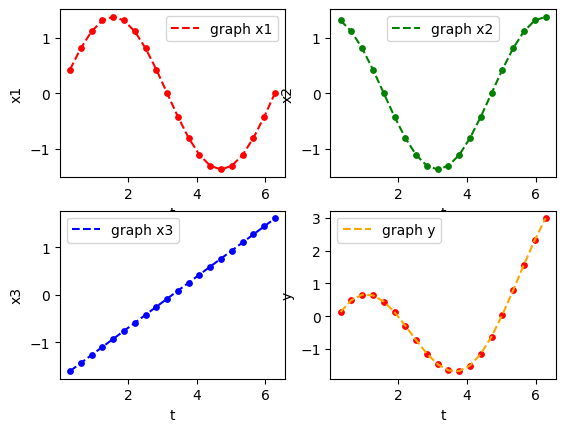

In [39]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(t, x1, color = 'red', s = 15)
axs[0, 0].plot(t, x1, color = 'red', linestyle = '--', label = 'graph x1')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('x1')
axs[0, 0].legend()
axs[0, 1].scatter(t, x2, color = 'green', s = 15)
axs[0, 1].plot(t, x2, color = 'green', linestyle = '--', label = 'graph x2')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('x2')
axs[0, 1].legend()
axs[1, 0].scatter(t, x3, color = 'blue', s = 15)
axs[1, 0].plot(t, x3, color = 'blue', linestyle = '--', label = 'graph x3')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('x3')
axs[1, 0].legend()
axs[1, 1].scatter(t, y_plot, color = 'red', s = 15)
axs[1, 1].plot(t, y_plot, color = 'orange', linestyle = '--', label = 'graph y')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('y')
axs[1, 1].legend()

In [40]:
w, lst_err_grad = train_adaline(x, y, learning_rate = 0.01, tol = 0.01, maxepochs = 10, control_var = True)

/tmp/ipykernel_677144/2386003739.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lst_errors_grad[n_epochs] = erro_grad / N_inputs


##### Gerando o teste e os seus respectivos gráficos.

In [41]:
t_test = np.arange(start = 0, stop = 2*np.pi, step = 0.15*np.pi)
x1 = np.array(t_test**2)
x2 = 1.37*np.tanh(t_test)
x3 = t_test
x_final = np.column_stack([x1, x2, x3, np.ones_like(x1)])
y_hat = x_final @ w
w

array([-0.24997741,  1.90637491,  1.7155107 ,  1.39014961])

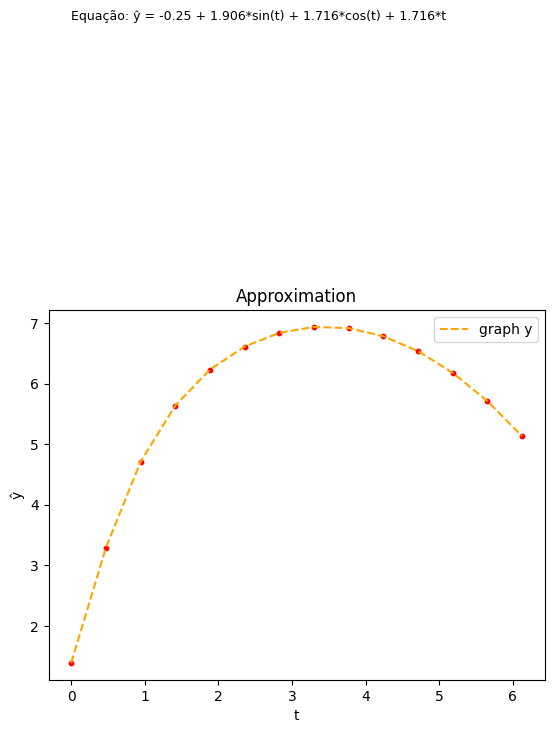

In [42]:
plt.scatter(t_test, y_hat, color = 'red', s = 10)
plt.plot(t_test, y_hat, color = 'orange', linestyle = '--', label ='graph y')
plt.xlabel('t')
plt.ylabel('ŷ')
plt.title("Approximation")
plt.text(0, 12, f'Equação: ŷ = {np.round(w[0],3)} + {np.round(w[1],3)}*sin(t) + {np.round(w[2],3)}*cos(t) + {np.round(w[2],3)}*t', fontsize = 9, color = 'black')
plt.legend()